In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def zone_group(df, by=None, round_val=5,on=0.001):
    
    round_fun= lambda x: round(np.mean(x), round_val) if round_val!=0 else np.mean(x)

    df["date"] = pd.to_datetime(df["date"])
    df['Week'] = df['date'].dt.isocalendar().week

    df = df.groupby(by+['longitude', 'latitude'], as_index=False).size()
    df.rename(columns={"size": "Num"}, inplace=True)
    
    temp = df.sort_values("longitude")
    if by is not None:
        temp = temp.groupby(by)
    long_group = temp["longitude"].diff().gt(on).cumsum()
    
    temp = df.sort_values("latitude")
    if by is not None:
        temp = temp.groupby(by)
    lat_group = temp["latitude"].diff().gt(on).cumsum()
    
    temp = [long_group,lat_group]
    if by is not None:
        temp += by
    grouped = df.groupby(temp, as_index=False)
    grouped = grouped.agg(
        Longitude=('longitude', round_fun),
        Latitude=('latitude', round_fun),
        Num=('Num', sum))
 
    grouped.drop(grouped[grouped.Num < 10].index, inplace=True)
    
    return grouped.sort_values(by="Num")

df_anon = pd.read_csv("../../Défense2/ano_finale.csv", sep='\t', header=None, names=['id', 'date', 'longitude', 'latitude'])
df_original = pd.read_csv("../../ref.csv", sep='\t', header=None, names=['id', 'date', 'longitude', 'latitude'])

grouped_tra_ori=zone_group(df_original, by=["Week"],round_val=3,on=0.005 )
size_ano=len(df_anon)
df_anon=df_anon[df_anon["id"]!="DEL"]
ratio=len(df_anon)/size_ano
grouped_tra_ano=zone_group(df_anon, by=["Week"],round_val=3,on=0.05 )

grouped_tra_ano.Num=(grouped_tra_ano.Num/ratio).apply(int)

merged=pd.merge(grouped_tra_ori,grouped_tra_ano,on=["Week","Longitude","Latitude"])


count=0
for line in merged.itertuples():
    count+=min(line[5]/line[4],line[4]/line[5])
score=count/len(merged)

print(score)

C:\Users\jules\AppData\Local\Temp\ipykernel_27920\4626677.py:30: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  grouped = grouped.agg(
C:\Users\jules\AppData\Local\Temp\ipykernel_27920\4626677.py:30: FutureWarning: A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.
  grouped = grouped.agg(


0.8524702244089191


C:\Users\jules\AppData\Local\Temp\ipykernel_27920\4626677.py:30: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  grouped = grouped.agg(
C:\Users\jules\AppData\Local\Temp\ipykernel_27920\4626677.py:30: FutureWarning: A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.
  grouped = grouped.agg(


In [12]:
merged

Week  Longitude  Latitude   Num_x   Num_y
0      19      2.316    49.857      10      10
1      16      0.286    48.068      10      10
2      11      1.405    43.706      10      10
3      14      4.913    43.924      10      10
4      14     -1.273    48.101      10      10
..    ...        ...       ...     ...     ...
429    15      4.282    45.566   73391   73391
430    12      4.282    45.565   76851   77107
431    18      6.977    48.479   78647   79037
432    10      6.636    44.895   84407   84541
433    16     -6.270    53.348  122453  122453

[434 rows x 5 columns]

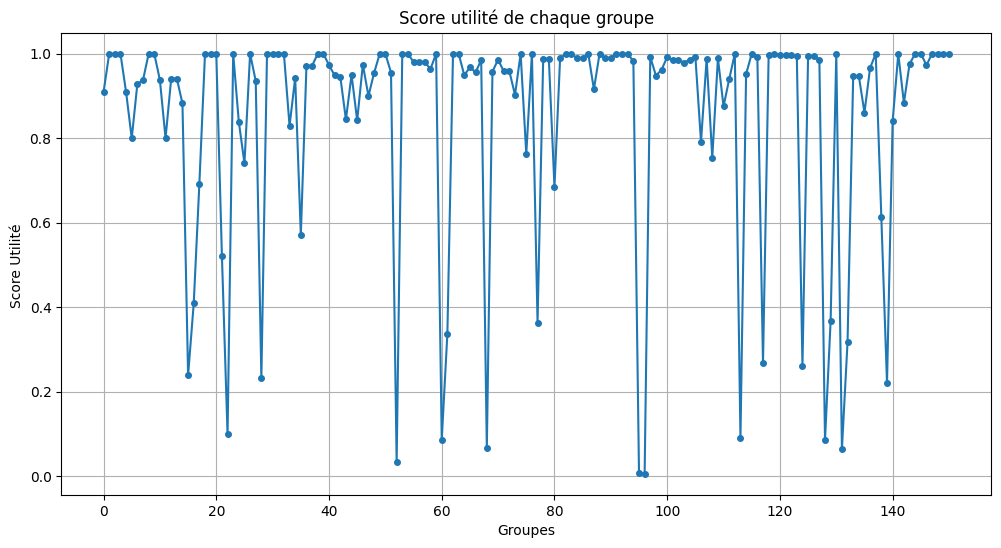

In [17]:
# Assurez-vous d'avoir matplotlib et seaborn importés
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer le score d'utilité pour chaque ligne et l'ajouter comme nouvelle colonne
merged['Utility Score'] = merged.apply(lambda row: min(row['Num_x'] / row['Num_y'], row['Num_y'] / row['Num_x']), axis=1)


plt.figure(figsize=(12, 6))
plt.plot(merged.index, merged['Utility Score'], marker='o', linestyle='-', markersize=4)
plt.title('Score utilité de chaque groupe')
plt.xlabel('Groupes')
plt.ylabel('Score Utilité ')
plt.grid(True)
plt.show()



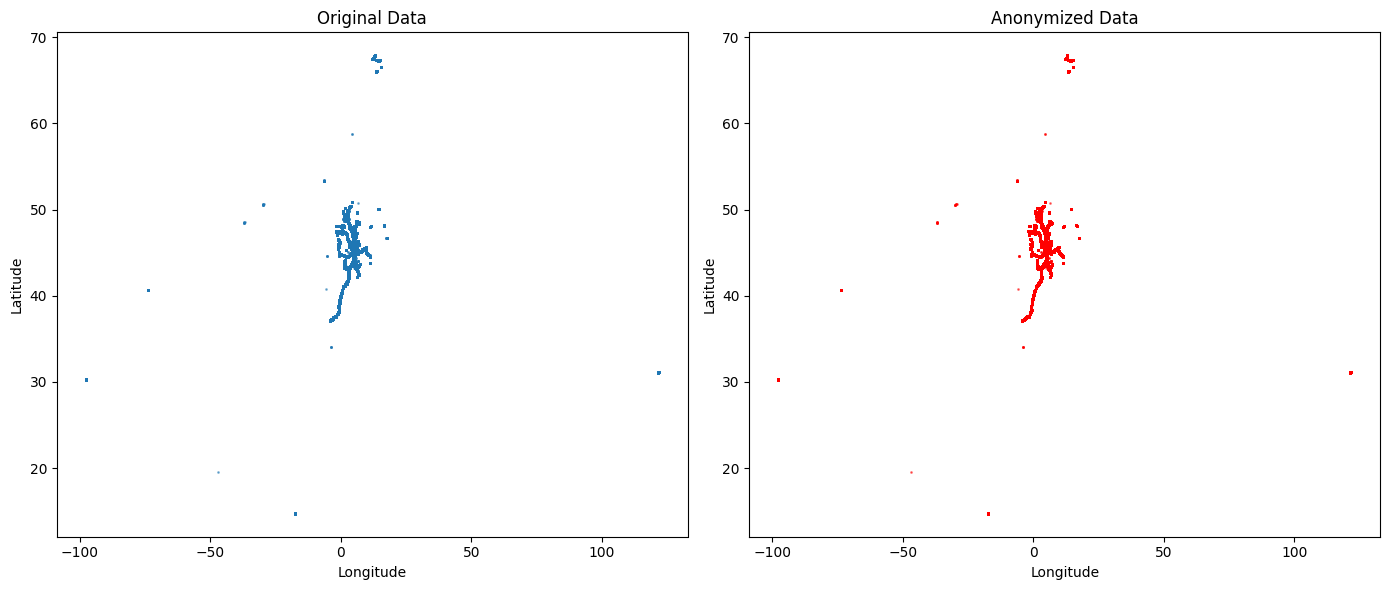

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
# Données originales
plt.subplot(1, 2, 1)
plt.scatter(df_original['longitude'], df_original['latitude'], alpha=0.5, s=1)
plt.title('Original Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Données anonymisées
plt.subplot(1, 2, 2)
plt.scatter(df_anon['longitude'], df_anon['latitude'], alpha=0.5, s=1, color='r')
plt.title('Anonymized Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()
